Alejandro Restrepo Giraldo CC: 1001389709

# Laboratorio 8.0

In [1]:
# Librerías 
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tensorflow import keras

2022-08-28 20:10:27.307901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-28 20:10:27.308007: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Se cargan los datos

In [2]:
data_train= "Curso_aprendizaje_estadistico/Assesment/dataset/train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")
 
data_test= "Curso_aprendizaje_estadistico/Assesment/dataset/test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

In [3]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [6]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]

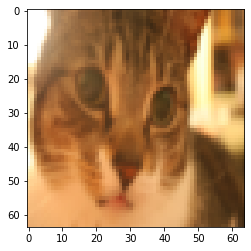

In [7]:
plt.imshow(xtrain[200])

In [24]:
# Se vectorizan los datos
xtrain_ = np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

train_label_ = np.reshape(train_label,209)
test_label_ = np.reshape(test_label,50)

#### Modelo de red neuronal (NN)

In [46]:
#  Topología de la red: [12288, 3, 4, 1] con la función de activación 

model = keras.models.Sequential()
model.add(keras.layers.Dense(500, input_dim=12288, activation='relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(30, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'softmax'))

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 500)               6144500   
                                                                 
 dense_20 (Dense)            (None, 100)               50100     
                                                                 
 dense_21 (Dense)            (None, 30)                3030      
                                                                 
 dense_22 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6,197,661
Trainable params: 6,197,661
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Se especifica la función de coste, el optimizador y la métrica
opt = keras.optimizers.SGD(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [49]:
# Se entrena la red neuronal
history = model.fit(xtrain_, train_label_ , validation_data=(xtest_, test_label_),  epochs= 20, verbose=2)

Epoch 1/20
7/7 - 1s - loss: 0.6602 - accuracy: 0.3445 - val_loss: 0.7042 - val_accuracy: 0.6600 - 828ms/epoch - 118ms/step
Epoch 2/20
7/7 - 0s - loss: 0.6383 - accuracy: 0.3445 - val_loss: 0.7521 - val_accuracy: 0.6600 - 181ms/epoch - 26ms/step
Epoch 3/20
7/7 - 0s - loss: 0.6106 - accuracy: 0.3445 - val_loss: 0.8382 - val_accuracy: 0.6600 - 242ms/epoch - 35ms/step
Epoch 4/20
7/7 - 0s - loss: 0.5999 - accuracy: 0.3445 - val_loss: 1.0762 - val_accuracy: 0.6600 - 179ms/epoch - 26ms/step
Epoch 5/20
7/7 - 0s - loss: 0.5905 - accuracy: 0.3445 - val_loss: 0.8239 - val_accuracy: 0.6600 - 176ms/epoch - 25ms/step
Epoch 6/20
7/7 - 0s - loss: 0.5817 - accuracy: 0.3445 - val_loss: 1.2885 - val_accuracy: 0.6600 - 176ms/epoch - 25ms/step
Epoch 7/20
7/7 - 0s - loss: 0.6036 - accuracy: 0.3445 - val_loss: 0.7156 - val_accuracy: 0.6600 - 176ms/epoch - 25ms/step
Epoch 8/20
7/7 - 0s - loss: 0.5632 - accuracy: 0.3445 - val_loss: 0.9900 - val_accuracy: 0.6600 - 180ms/epoch - 26ms/step
Epoch 9/20
7/7 - 0s - l

Train: 0.344, Test: 0.660


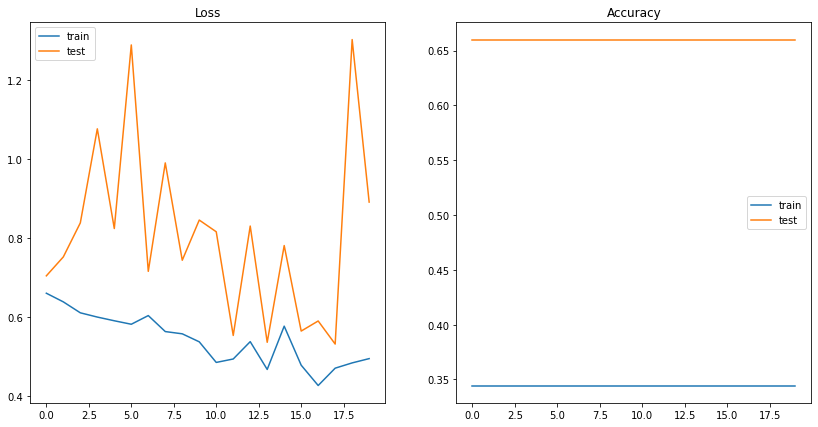

In [50]:
# Evaluación del modelo
_, train_acc = model.evaluate(xtrain_, train_label_, verbose=0)
_, test_acc = model.evaluate(xtest_, test_label_, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Gráficas:
plt.figure(figsize=(14,7))

# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()